In [2]:
import pandas as pd
import numpy as np
import warnings
# 用来忽略seaborn绘图库产生的warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

%matplotlib inline

import tushare as ts

# 时点数据的可视化

## 折线图(Line Chart)

如果特征数据与一系列时点相关，很自然的表达方式就是折线图。比如每日收盘价的折线图：

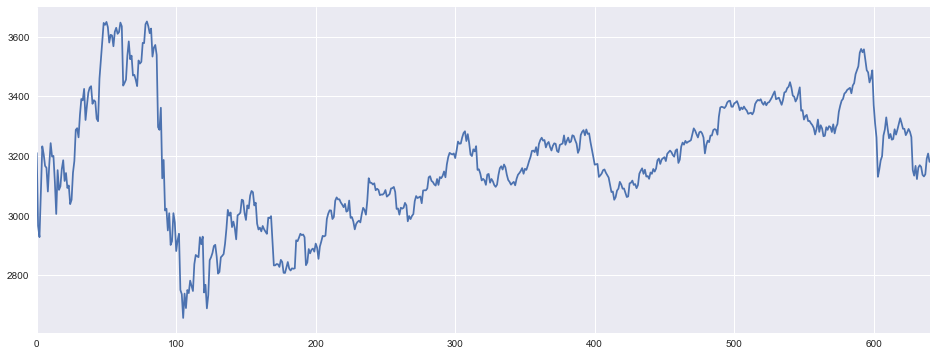

In [56]:
df = ts.get_k_data('000001', index=True)
sns.set({"figure.figsize":[16,6]})
sns.tsplot(df['close'])

## 闪电图(Tick Chart)

一种特殊的折线图是 Tick图(闪电图)，一般用于显示股票tick数据。其要求数据随时间轴均匀分布：

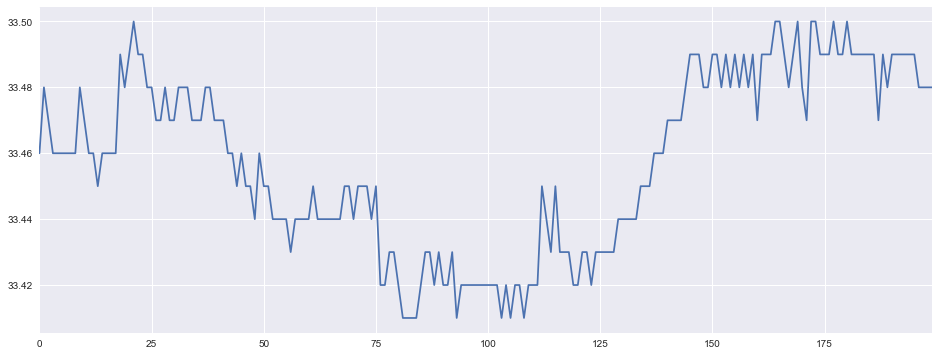

In [61]:
df = ts.get_tick_data('000002',date='2018-03-09')
sns.set({"figure.figsize":[16,6]})
sns.tsplot(df['price'][0:200])

## 面积图/地平线图

当数据值为大于零，且有限值，并且变化比较大时（通常为某种占比），可以绘制面积图(Area Plot)。面积图也叫地平线图( Horizon Chart)：

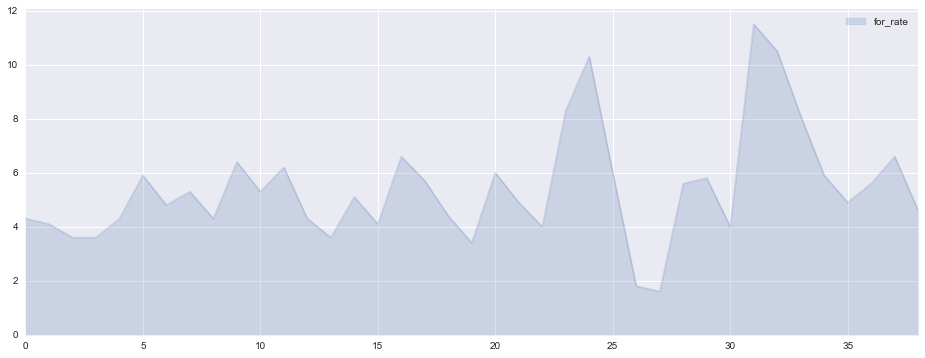

In [8]:
df=ts.get_gdp_for()
# 数据中的asset_rate和goods_rate，都同时存在正值和负值，所以不能绘制
df[['for_rate']].plot(kind='area', alpha=0.2)

## 多个特征变量的折线图

如果有多个特征数据，可以放到一张折线图上：

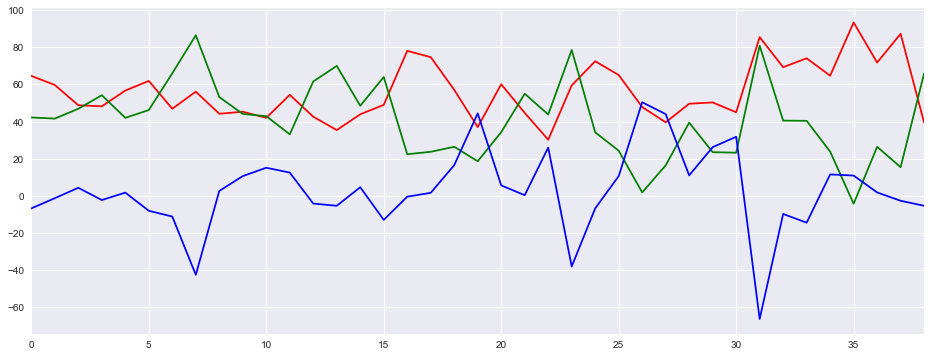

In [64]:
df=ts.get_gdp_for()
sns.set({"figure.figsize":[16,6]})
sns.tsplot(df['end_for'],color='red')
sns.tsplot(df['asset_for'],color='green')
sns.tsplot(df['goods_for'],color='blue')

## 多特变量的面积图

多个数据的面积图，体现出“叠加”效果：

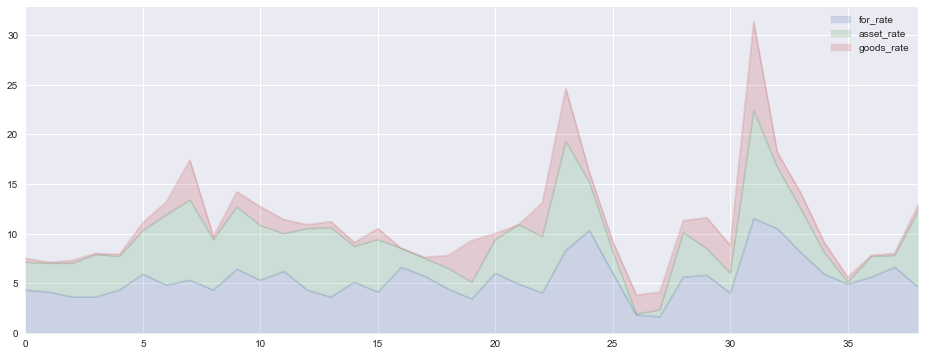

In [11]:
df=ts.get_gdp_for()
df1 = pd.DataFrame()
df1['for_rate'] = df['for_rate']
df1['asset_rate'] = df['asset_rate'].abs()
df1['goods_rate'] = df['goods_rate'].abs()
df1.plot(kind='area', alpha=0.2)

# 时段数据的可视化

对于时段的累计数据，用柱状图/条形图(Column Chart/ Bar Chart)比折线图更直观。 其中，数据较少时用柱状图，数据较多时用条形图。

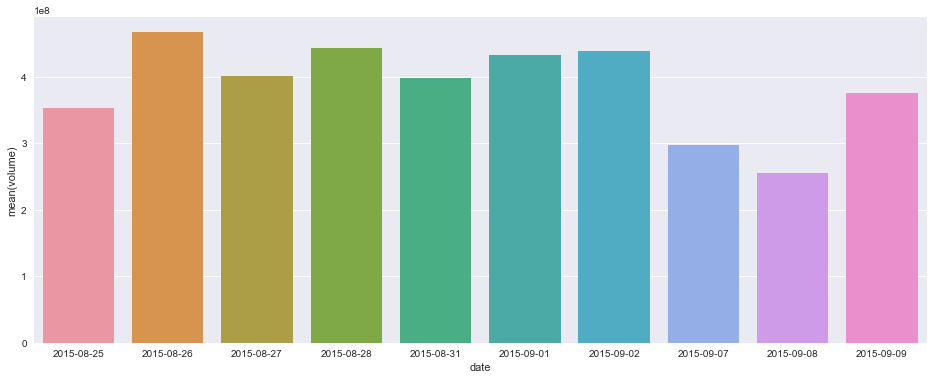

In [15]:
df = ts.get_k_data('000001', index=True)
sns.set({"figure.figsize":[16,6]})
#sns.barplot(df['volume'])
sns.barplot(x="date", y="volume", data=df[:10])

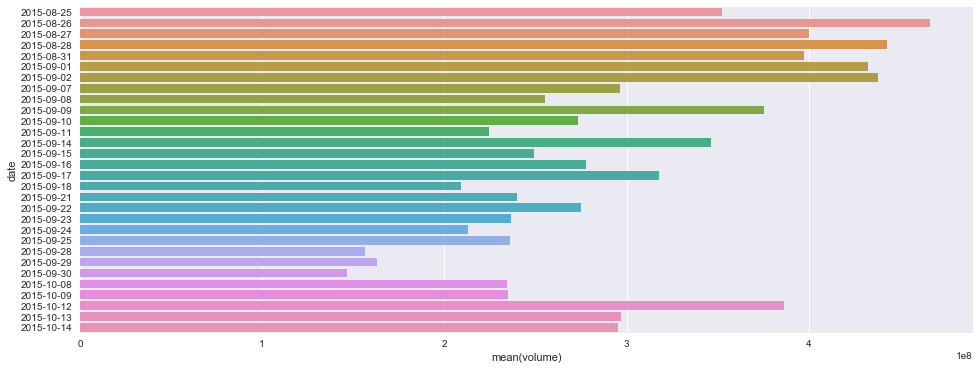

In [16]:
# 数据较多时，使用 bar chart效果更好
sns.barplot(y="date", x="volume", data=df[:30])

## 一个特征变量+一个分类变量的柱状图

用颜色区分

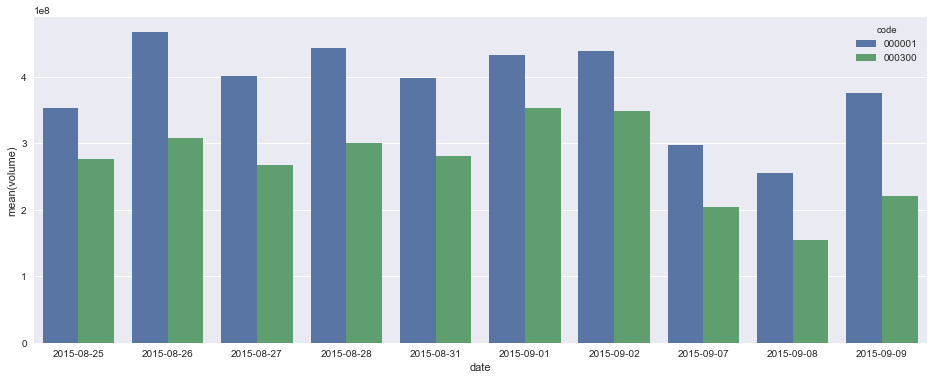

In [29]:
df=pd.DataFrame()
df[['date','volume']] = ts.get_k_data('000001', index=True)[['date','volume']]
df['code']='000001'
df=df[0:10]

df2=pd.DataFrame()
df2[['date','volume']] = ts.get_k_data('000300', index=True)[['date','volume']]
df2['code']='000300'
df=df.append(df2[:10])

sns.set({"figure.figsize":[16,6]})
sns.barplot(x='date',y='volume',hue='code',data=df)


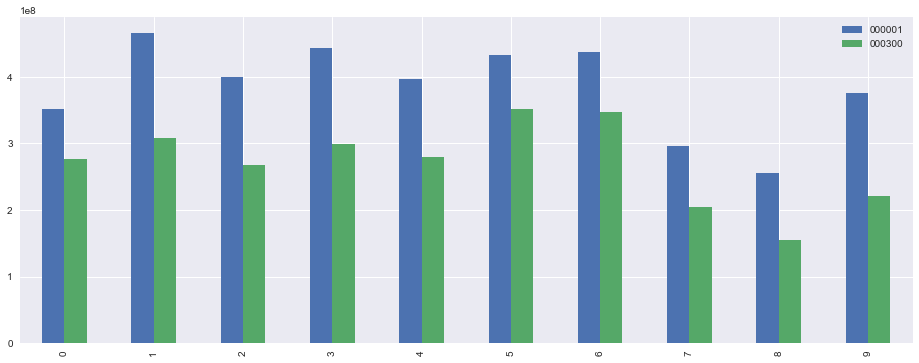

In [33]:
# 直接使用pandas绘图

df=pd.DataFrame()
df[['date','000001']]=ts.get_k_data('000001', index=True)[['date','volume']]
df['000300']=ts.get_k_data('000300', index=True)['volume']
df[:10].plot.bar()

## 堆叠柱状图

如果多个特征变量是某一个总量的组成部分，可以绘制堆叠柱状图

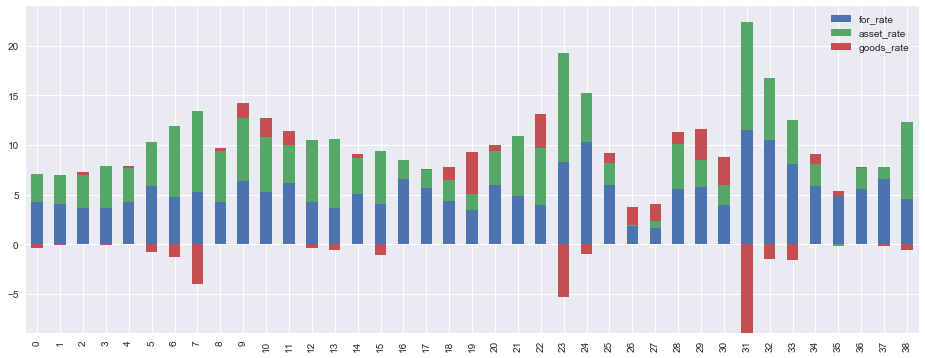

In [36]:
df=ts.get_gdp_for()
df[['for_rate','asset_rate','goods_rate']].plot.bar(stacked=True)

## K线图可以看作柱状图的变体

In [54]:
import matplotlib.pyplot as plt
import matplotlib.finance as mpf

wdyx = ts.get_k_data('002739')[-100:]

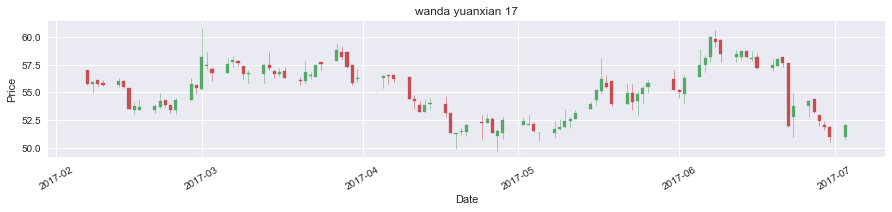

In [53]:
# 由于数据不是通过,mpf.candlestick_ohlc()获取的,所以日期的格式与,绘图函数的不一致
# tushare回去的数据对象为DataFrame类型
# 所以要将格式转换为mpf.candlestick_ohlc()能够处理的浮点数格式

# 导入两个涉及的库
from matplotlib.pylab import date2num
import datetime

# 对tushare获取到的数据转换成candlestick_ohlc()方法可读取的格式
'''
data_list = []
for dates,row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    open,high,low,close = row[:4]
    datas = (t,open,high,low,close)
    data_list.append(datas)
'''
def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.datetime.strptime(date,'%Y-%m-%d')
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time
# dataframe转换为二维数组
mat_wdyx = wdyx.as_matrix()
num_time = date_to_num(mat_wdyx[:,0])
mat_wdyx[:,0] = num_time


# 接下来可以绘制K线图了
1

fig, ax = plt.subplots(figsize=(15,5))
fig.subplots_adjust(bottom=0.5)
mpf.candlestick_ochl(ax, mat_wdyx, width=0.6, colorup='g', colordown='r', alpha=1.0)
plt.grid(True)
# 设置日期刻度旋转的角度 
plt.xticks(rotation=30)
plt.title('wanda yuanxian 17')
plt.xlabel('Date')
plt.ylabel('Price')
# x轴的刻度为日期
ax.xaxis_date ()
###candlestick_ochl()函数的参数
# ax 绘图Axes的实例
# mat_wdyx 价格历史数据
# width    图像中红绿矩形的宽度,代表天数
# colorup  收盘价格大于开盘价格时的颜色
# colordown   低于开盘价格时矩形的颜色
# alpha      矩形的颜色的透明度

# 连接散点图(connected scatterplot)

对于两个不相关的特征变量随时间的变化，一种有意思的做法是用这两个特征变量构建平面，每个点表示某个时点这两个变量的值。
然后按照时间顺序将这些点连接起来，用以预测下一个点的大概位置。

比如申万金工的“风格轮动”研究：

![](connected1.jpg)

![](connected2.jpg)

![](connected3.jpg)

# 循环时间周期与雷达图(Radar Chart )

如果要研究特征变量的周期性变化，还可以使用雷达图。

可以表示多个周期，或者多个特征变量，但个数都不宜太多。

![](radar1.jpg)

![](radar2.jpg)

![](radar3.jpg)